In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

2025-07-19 07:04:06.397768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752908646.649731      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752908646.726475      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import cv2
import os
import glob

In [4]:
img_dir="/kaggle/input/car-plate-detection/images"

data_path=os.path.join(img_dir,'*g')
files=glob.glob(data_path)

files

['/kaggle/input/car-plate-detection/images/Cars393.png',
 '/kaggle/input/car-plate-detection/images/Cars376.png',
 '/kaggle/input/car-plate-detection/images/Cars87.png',
 '/kaggle/input/car-plate-detection/images/Cars190.png',
 '/kaggle/input/car-plate-detection/images/Cars177.png',
 '/kaggle/input/car-plate-detection/images/Cars200.png',
 '/kaggle/input/car-plate-detection/images/Cars338.png',
 '/kaggle/input/car-plate-detection/images/Cars356.png',
 '/kaggle/input/car-plate-detection/images/Cars336.png',
 '/kaggle/input/car-plate-detection/images/Cars405.png',
 '/kaggle/input/car-plate-detection/images/Cars54.png',
 '/kaggle/input/car-plate-detection/images/Cars248.png',
 '/kaggle/input/car-plate-detection/images/Cars202.png',
 '/kaggle/input/car-plate-detection/images/Cars70.png',
 '/kaggle/input/car-plate-detection/images/Cars235.png',
 '/kaggle/input/car-plate-detection/images/Cars121.png',
 '/kaggle/input/car-plate-detection/images/Cars158.png',
 '/kaggle/input/car-plate-detectio

In [5]:
img_dir="/kaggle/input/car-plate-detection/images"

data_path=os.path.join(img_dir,'*g')
files=glob.glob(data_path)
files.sort()

IMAGE_SIZE=(224)
X=[]
for file in files:
    img=cv2.imread(file)
    img=cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))   #convert img to array of pixels

In [6]:
X[0:3]   # first 3 images

[array([[[135, 108,  54],
         [158, 124,  45],
         [179, 146,  79],
         ...,
         [ 41,  43,  42],
         [ 43,  41,  40],
         [ 37,  36,  34]],
 
        [[128, 105,  53],
         [154, 120,  41],
         [149, 119,  53],
         ...,
         [ 46,  46,  45],
         [ 42,  44,  41],
         [ 35,  37,  34]],
 
        [[127, 108,  63],
         [153, 121,  43],
         [153, 126,  63],
         ...,
         [ 44,  41,  41],
         [ 47,  49,  45],
         [ 36,  38,  34]],
 
        ...,
 
        [[ 40,  48,  71],
         [ 41,  49,  72],
         [ 42,  50,  73],
         ...,
         [ 43,  62,  99],
         [ 46,  67, 101],
         [ 47,  67, 102]],
 
        [[ 44,  52,  75],
         [ 43,  51,  74],
         [ 41,  49,  72],
         ...,
         [ 42,  62,  99],
         [ 47,  66, 103],
         [ 48,  67, 104]],
 
        [[ 44,  52,  75],
         [ 41,  50,  73],
         [ 39,  47,  70],
         ...,
         [ 45,  64, 102],
  

In [7]:
from lxml import etree

def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmin), int(ymin), int(xmax), int(ymax)]


path = '/kaggle/input/car-plate-detection/annotations'
text_files = ['/kaggle/input/car-plate-detection/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [8]:

len(y)

433

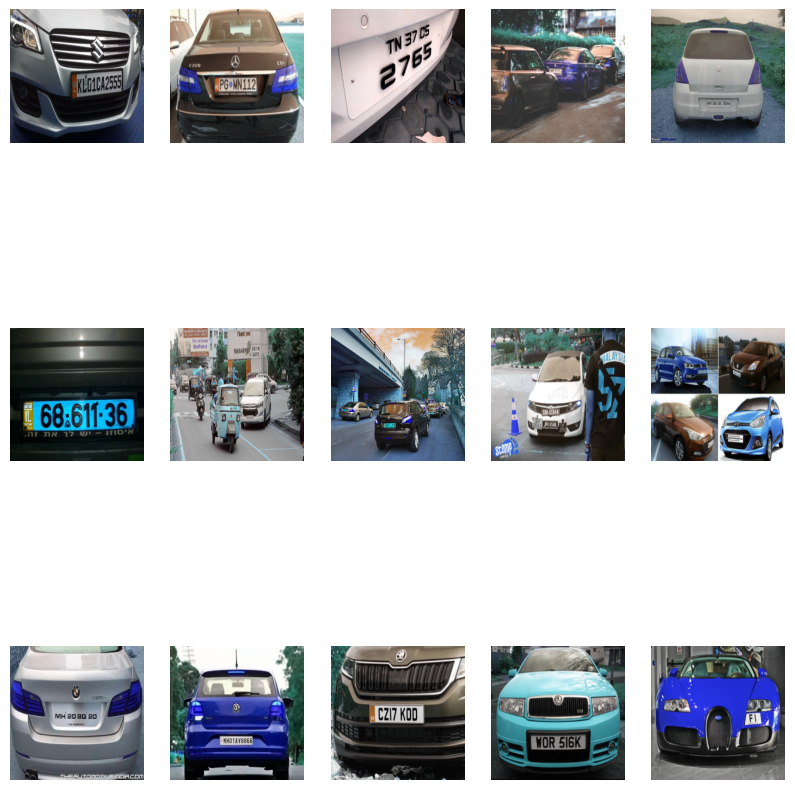

In [9]:
plt.figure(figsize=(10,20))
for i in range(0,15):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

In [10]:
# number plate


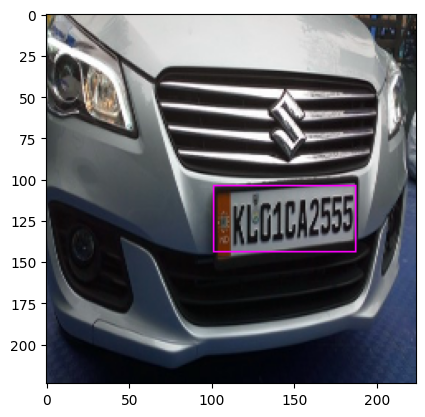

In [11]:

image = cv2.rectangle(X[0],
                      (y[0][0],y[0][1]),
                      (y[0][2],y[0][3]),
                      (255, 0, 255))
plt.imshow(image)
plt.show()

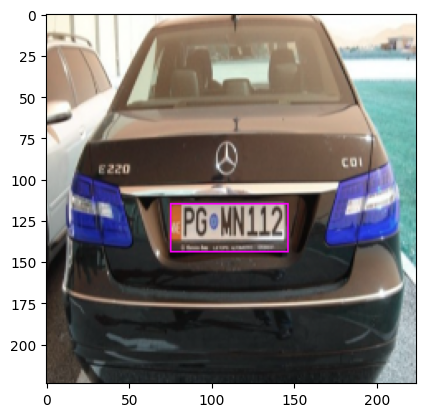

In [12]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(255, 0, 255))
plt.imshow(image)
plt.show()

In [13]:
X = np.array(X)
y = np.array(y)
X[0]

array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]]

In [14]:
y[0]

array([101, 104, 187, 144])

In [15]:
X = X / 255
y = y / 255
X[0]

array([[[0.52941176, 0.42352941, 0.21176471],
        [0.61960784, 0.48627451, 0.17647059],
        [0.70196078, 0.57254902, 0.30980392],
        ...,
        [0.16078431, 0.16862745, 0.16470588],
        [0.16862745, 0.16078431, 0.15686275],
        [0.14509804, 0.14117647, 0.13333333]],

       [[0.50196078, 0.41176471, 0.20784314],
        [0.60392157, 0.47058824, 0.16078431],
        [0.58431373, 0.46666667, 0.20784314],
        ...,
        [0.18039216, 0.18039216, 0.17647059],
        [0.16470588, 0.17254902, 0.16078431],
        [0.1372549 , 0.14509804, 0.13333333]],

       [[0.49803922, 0.42352941, 0.24705882],
        [0.6       , 0.4745098 , 0.16862745],
        [0.6       , 0.49411765, 0.24705882],
        ...,
        [0.17254902, 0.16078431, 0.16078431],
        [0.18431373, 0.19215686, 0.17647059],
        [0.14117647, 0.14901961, 0.13333333]],

       ...,

       [[0.15686275, 0.18823529, 0.27843137],
        [0.16078431, 0.19215686, 0.28235294],
        [0.16470588, 0

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)


In [17]:
model = Sequential()
# feature extactor
# 1st covolutional layer
model.add(Conv2D(64, (3,3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

# 2st covolutional layer
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


# classification 
model.add(Flatten()) 
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
train = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=50, batch_size=32, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-19 07:04:36.555965: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5086 - loss: 0.1073 - val_accuracy: 0.3714 - val_loss: 0.0243
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6584 - loss: 0.0285 - val_accuracy: 0.7143 - val_loss: 0.0188
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5704 - loss: 0.0203 - val_accuracy: 0.6571 - val_loss: 0.0158
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7187 - loss: 0.0147 - val_accuracy: 0.8286 - val_loss: 0.0122
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7672 - loss: 0.0099 - val_accuracy: 0.7143 - val_loss: 0.0110
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7879 - loss: 0.0057 - val_accuracy: 0.7143 - val_loss: 0.0103
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8661 - loss: 0.0043 - val_accuracy: 0.6571 - val_loss: 0.0085
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8342 - loss: 0.0029 - val_accuracy: 0.8000 - val_loss: